![](https://media.bizj.us/view/img/10530430/gettyimages-172241300*1200xx724-407-0-38.jpg)

# Business Problem

- Can a machine learning project be realized for salary predictions of baseball players whose salary information and career statistics from 1986 are shared?

# Dataset Story

- This data set was originally taken from the StatLib library at Carnegie Mellon University.

- The data set is part of the data used in the 1988 ASA Graphics Division Poster Session.

- Salary data was originally taken from Sports Illustrated, April 20, 1987.

- 1986 and career statistics are from Collier Books, published by Macmillan Publishing Company, New York Derived from the 1987 Baseball Encyclopedia Update.

**Variables**

- **AtBat:** The number of times a baseball was hit by a bat during the 1986-1987 season.

- **Hits:** Number of hits in the 1986-1987 season.

- **HmRun:** Most valuable at-bats in the 1986-1987 season.

- **Runs:** Runs scored for his team during the 1986-1987 season.

- **RBI:** The number of times a batter scored a run while batting.

- **Walks:** The number of errors committed by an opposing batter.

- **Years:** Number of years (years) a player has played in the major leagues.

- **CAtBats:** Number of at-bats during the player's career.

- **CHits:** Number of hits during the player's career.

- **CHmRun:** Player's most valuable run during his career.

- **CRuns:** The number of runs scored for the team during the player's career.

- **CRBI:** Number of runs scored by the player during his career.

- **CWalks:** The number of errors the player has allowed to opposing players during his career.

- **League:** A factor with A and N levels indicating the league the player played in until the end of the season.

- **Division:** A factor with levels E and W that indicates the position the player played at the end of 1986.

- **PutOuts:** Helping your teammate in the game.

- **Assits:** The number of assists made by the player in the 1986-1987 season.

- **Errors:** Number of errors by the player in the 1986-1987 season.

- **Salary:** Player's salary for the 1986-1987 season (in thousands).

- **NewLeague:** A factor with A and N levels indicating the player's league at the beginning of the 1987 season.

# Road Map

- **1. Import Required Libraries**

- **2. Adjusting Row Column Settings**

- **3. Loading the data Set**

- **4. Exploratory Data Analysis**

- **5. Capturing / Detecting Numeric and Categorical Variables**

- **6. Analysis of Categorical Variables**

- **7. Analysis of Numerical Variables**

- **8. Analysis of Categorical Variables by Target**

- **9. Analysis of Numeric Variables by Target**

- **10. Correlation Analysis**

- **11. Distribution of the Dependent Variable**

- **12. Examining the Logarithm of the Dependent Variable**

- **13. Outliers Analysis**

- **14. Missing Value Analysis**

- **15. Rare Analysis**

- **16. Feature Extraction**

- **17. Encoding**

- **18. Standardization Process**

- **19. Creating Model**

- **20. Hyperparameter optimization**

- **21. Final Model Predictions and Comparison with True Prices**

# 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Adjusting Row Column Settings

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 3. Loading the data Set

In [3]:
df = pd.read_csv("/kaggle/input/hitters-baseball-data/Hitters.csv")

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


# 4. Exploratory Data Analysis

In [5]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [6]:
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    32

# 5. Capturing / Detecting Numeric and Categorical Variables

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") 
    print(f"Variables: {dataframe.shape[1]}") 
    print(f'cat_cols: {len(cat_cols)}') 
    print(f'num_cols: {len(num_cols)}') 
    print(f'cat_but_car: {len(cat_but_car)}') 
    print(f'num_but_cat: {len(num_but_cat)}') 


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [8]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [9]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [10]:
cat_cols

['League', 'Division', 'NewLeague']

In [11]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [12]:
cat_but_car

[]

In [13]:
num_but_cat

[]

# 6. Analysis of Categorical Variables

In [14]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

   League  Ratio
A     175 54.348
N     147 45.652
##########################################


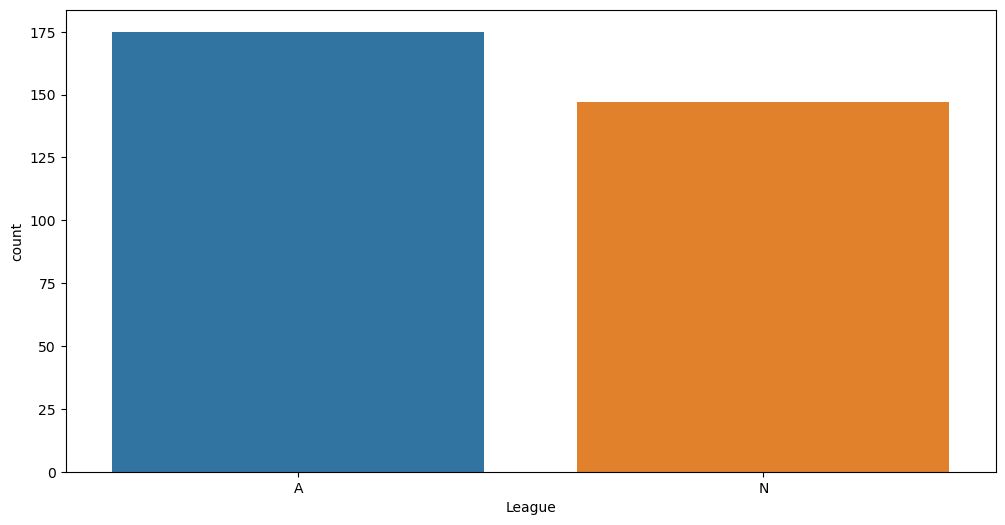

   Division  Ratio
W       165 51.242
E       157 48.758
##########################################


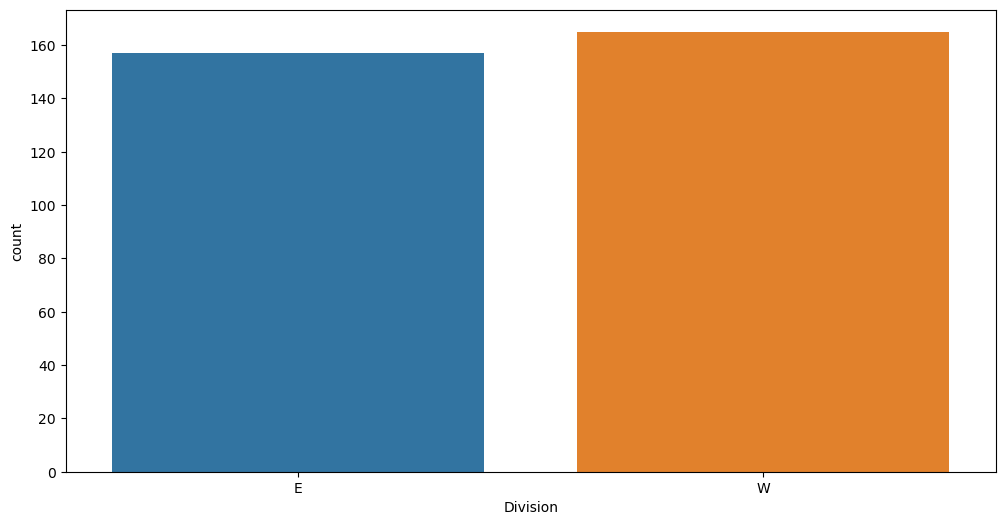

   NewLeague  Ratio
A        176 54.658
N        146 45.342
##########################################


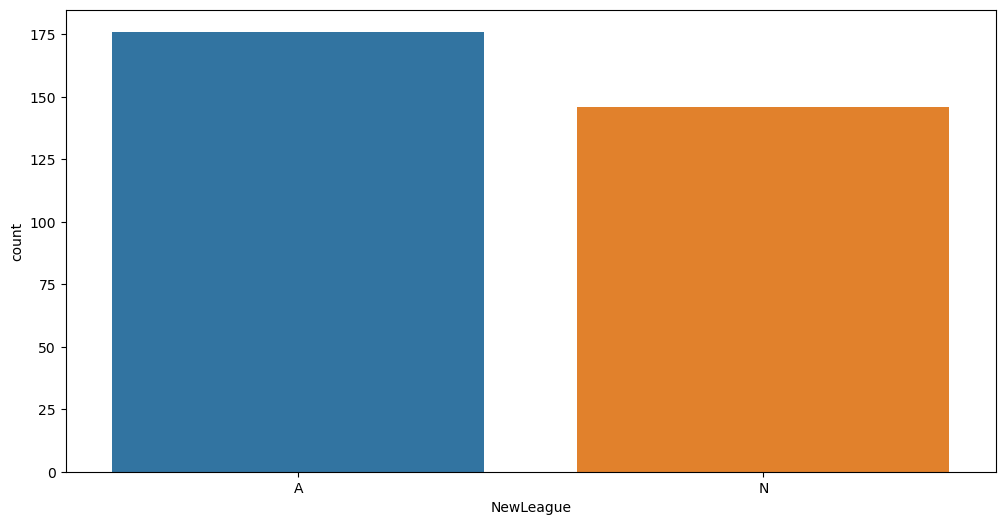

In [15]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

# 7. Analysis of Numerical Variables

In [16]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


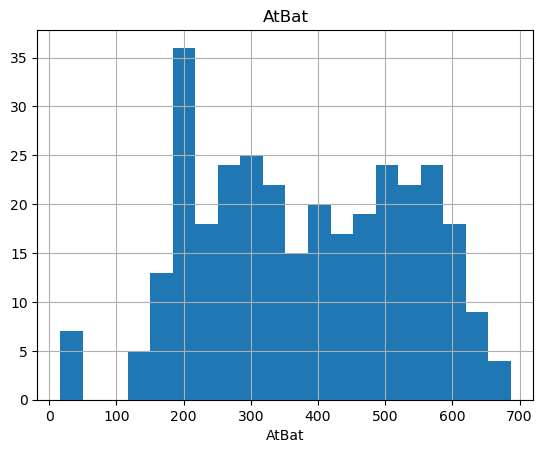

count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


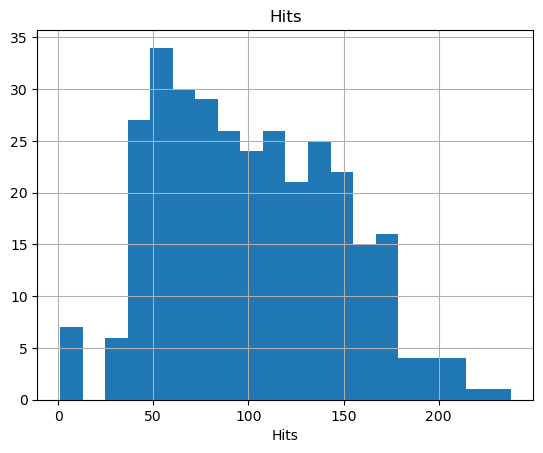

count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


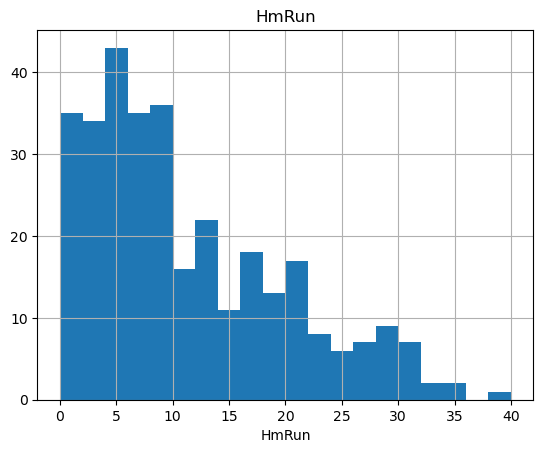

count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


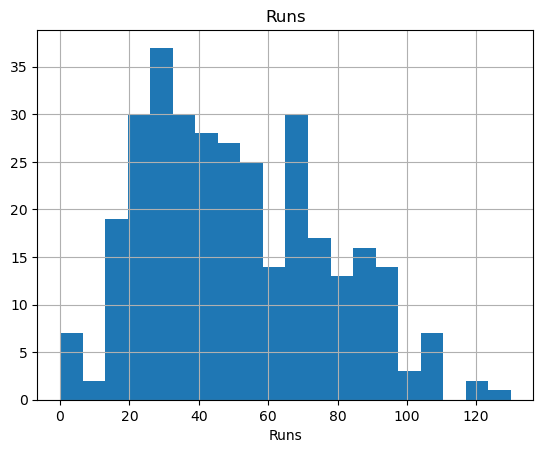

count   322.000
mean     48.028
std      26.167
min       0.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


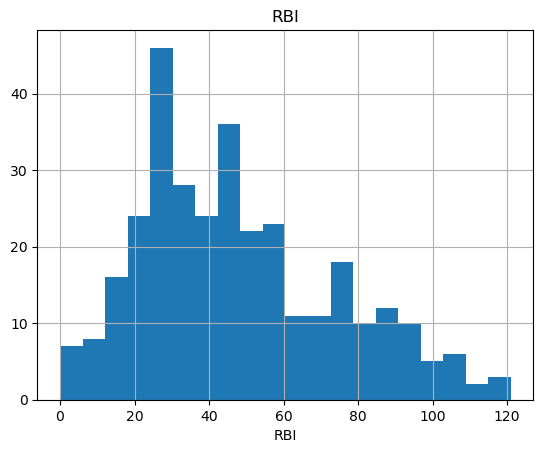

count   322.000
mean     38.742
std      21.639
min       0.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


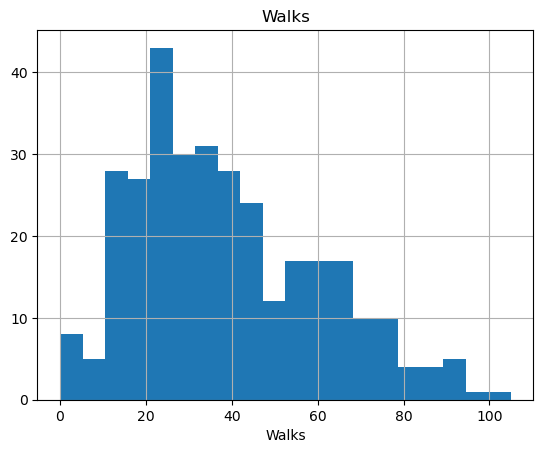

count   322.000
mean      7.444
std       4.926
min       1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


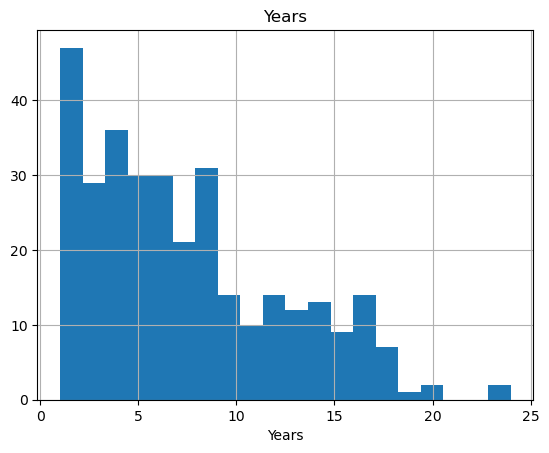

count     322.000
mean     2648.683
std      2324.206
min        19.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


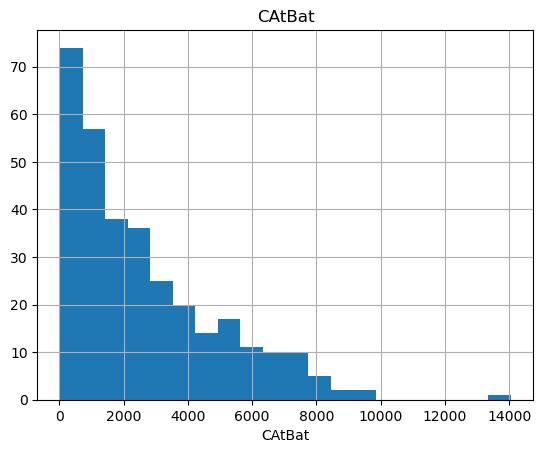

count    322.000
mean     717.571
std      654.473
min        4.000
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


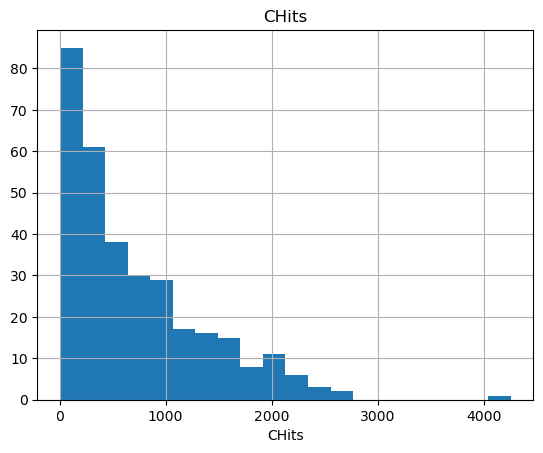

count   322.000
mean     69.491
std      86.266
min       0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


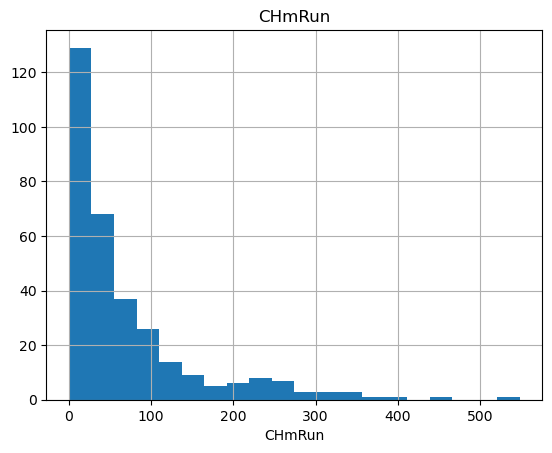

count    322.000
mean     358.795
std      334.106
min        1.000
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


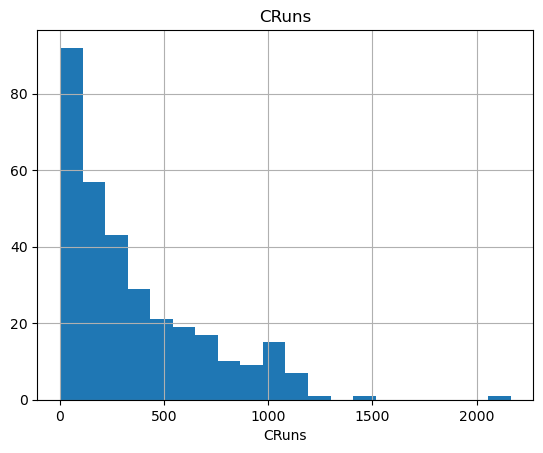

count    322.000
mean     330.118
std      333.220
min        0.000
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


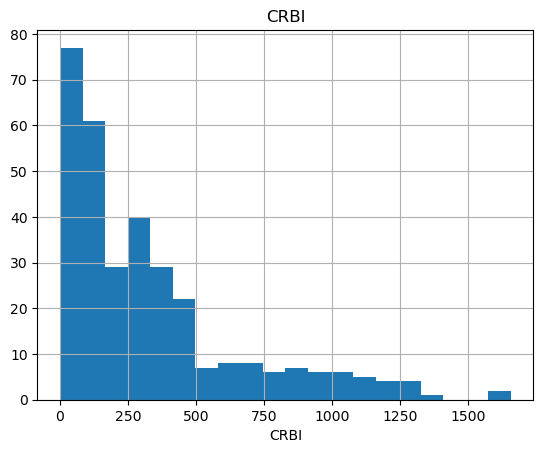

count    322.000
mean     260.239
std      267.058
min        0.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


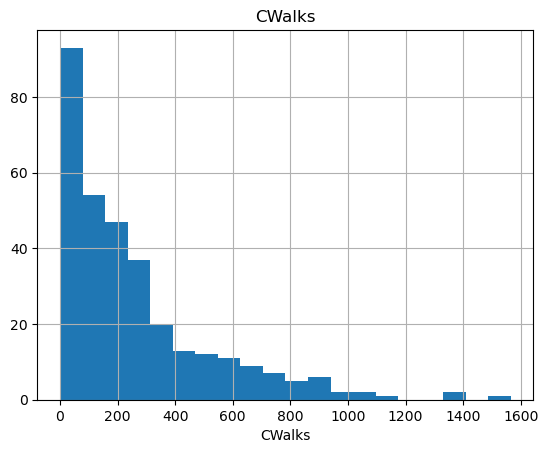

count    322.000
mean     288.938
std      280.705
min        0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


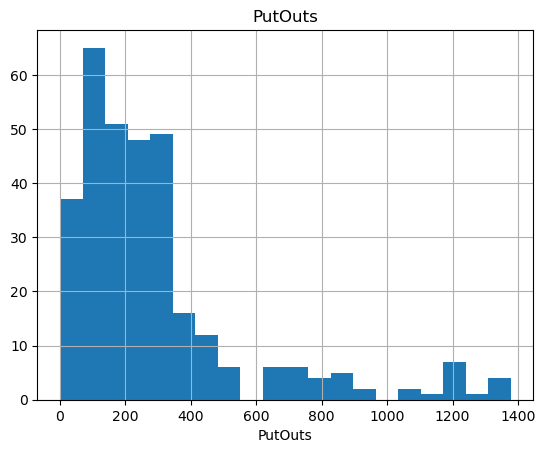

count   322.000
mean    106.913
std     136.855
min       0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


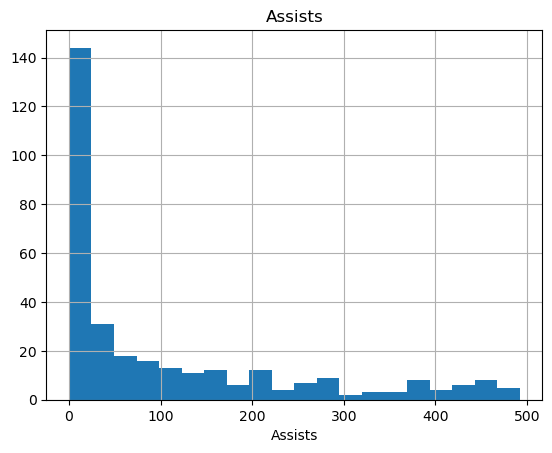

count   322.000
mean      8.040
std       6.368
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


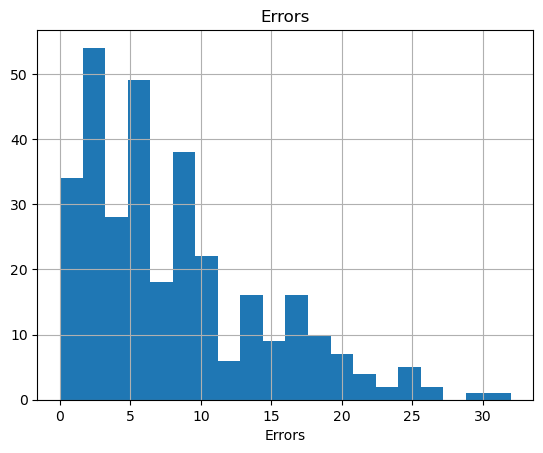

count    263.000
mean     535.926
std      451.119
min       67.500
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


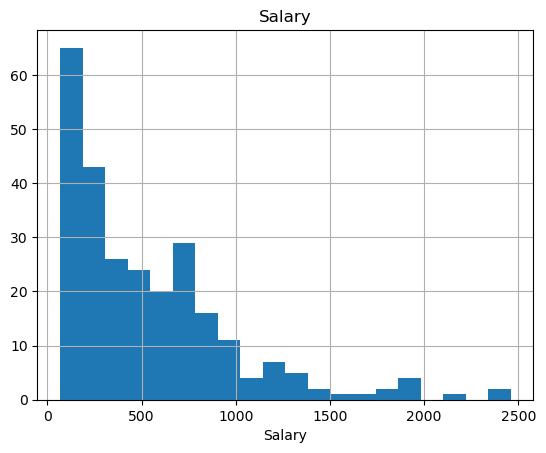

In [17]:
for col in num_cols:
    num_summary(df, col, plot=True)

# 8. Analysis of Categorical Variables by Target

In [18]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

        TARGET_MEAN
League             
A           542.000
N           529.118




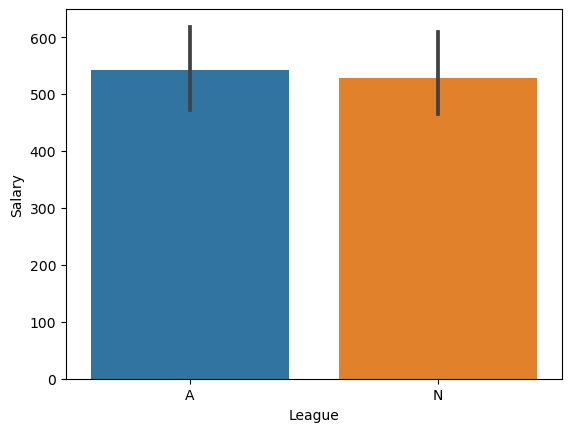

          TARGET_MEAN
Division             
E             624.271
W             450.877




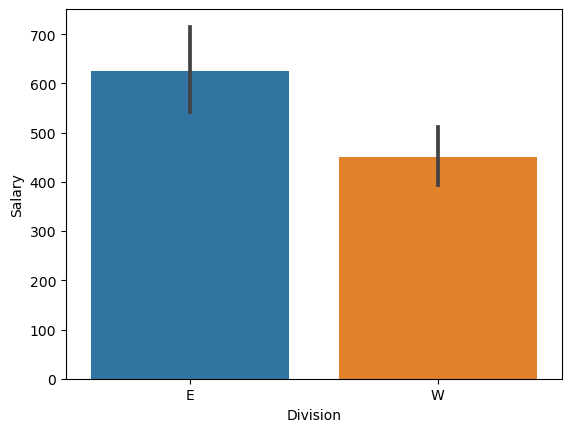

           TARGET_MEAN
NewLeague             
A              537.113
N              534.554




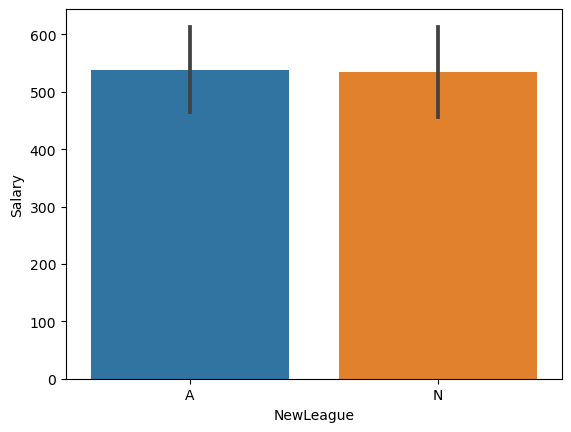

In [19]:
for col in cat_cols:
    target_summary_with_cat(df, 'Salary', col, plot=True)

# 9. Analysis of Numeric Variables by Target

In [20]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

In [21]:
for col in num_cols:
    target_summary_with_cat(df, 'Salary', col, plot=False)

       TARGET_MEAN
AtBat             
16             NaN
19         920.000
20        2127.333
22             NaN
24             NaN
...            ...
642        740.000
663        250.000
677       1975.000
680        365.000
687        350.000

[247 rows x 1 columns]


      TARGET_MEAN
Hits             
1        2127.333
2             NaN
3             NaN
4         920.000
6             NaN
...           ...
210        90.000
211       740.000
213       350.000
223       365.000
238      1975.000

[144 rows x 1 columns]


       TARGET_MEAN
HmRun             
0          636.233
1          293.000
2          280.764
3          300.036
4          393.873
5          397.556
6          304.869
7          372.462
8          407.938
9          740.417
10         540.233
11         382.500
12         490.417
13         648.773
14         750.833
15         544.375
16         425.833
17         840.417
18         437.685
19         987.500
20         851.759
21         858.914
22         

# 10. Analysis of Correlation

In [22]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (16, 14)})
        sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")  # annot=True added here
        plt.show()
    return drop_list

/tmp/ipykernel_20/2930675862.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


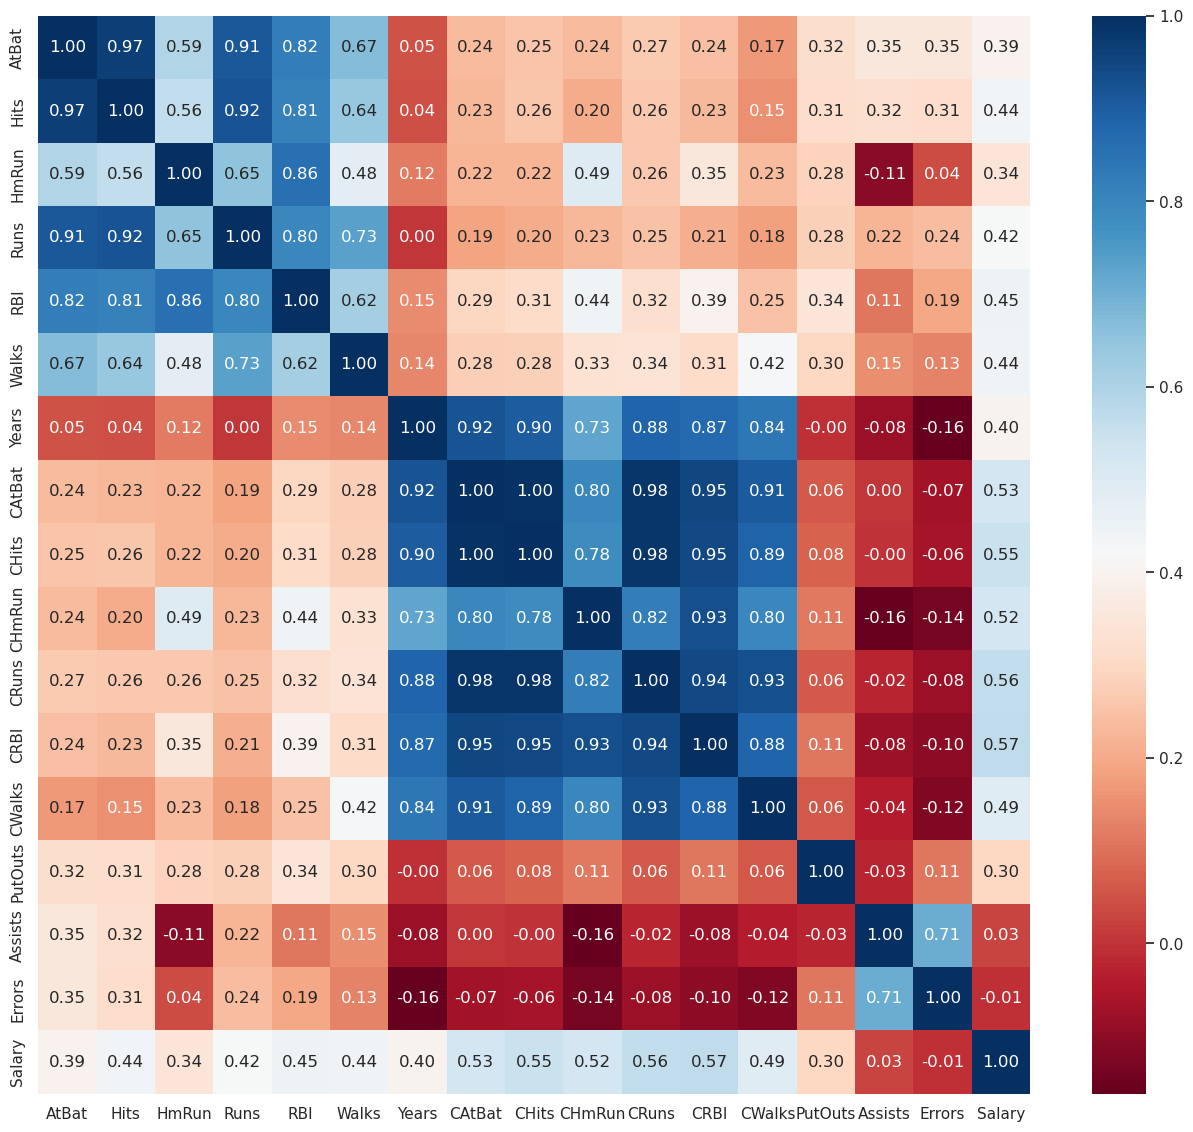

['Hits',
 'Runs',
 'RBI',
 'Walks',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'Errors']

In [23]:
high_correlated_cols(df, plot=True)

In [24]:
corr = df[num_cols].corr()

In [25]:
corr

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000,0.968,0.592,0.913,0.821,0.670,0.047,0.236,0.253,0.237,0.267,0.244,0.166,0.318,0.354,0.352,0.395
Hits,0.968,1.000,0.562,0.922,0.811,0.641,0.045,0.228,0.256,0.203,0.262,0.232,0.152,0.311,0.320,0.310,0.439
HmRun,0.592,0.562,1.000,0.651,0.855,0.481,0.116,0.222,0.221,0.493,0.262,0.352,0.233,0.283,-0.106,0.039,0.343
Runs,0.913,0.922,0.651,1.000,0.798,0.732,0.005,0.186,0.205,0.228,0.251,0.206,0.182,0.279,0.221,0.240,0.420
RBI,0.821,0.811,0.855,0.798,1.000,0.616,0.146,0.295,0.308,0.442,0.323,0.393,0.251,0.343,0.107,0.193,0.449
Walks,0.670,0.641,0.481,0.732,0.616,1.000,0.136,0.277,0.281,0.332,0.338,0.309,0.425,0.300,0.150,0.129,0.444
Years,0.047,0.045,0.116,0.005,0.146,0.136,1.000,0.920,0.904,0.727,0.883,0.869,0.839,-0.005,-0.081,-0.162,0.401
CAtBat,0.236,0.228,0.222,0.186,0.295,0.277,0.920,1.000,0.995,0.799,0.983,0.949,0.907,0.062,0.002,-0.067,0.526
CHits,0.253,0.256,0.221,0.205,0.308,0.281,0.904,0.995,1.000,0.783,0.985,0.945,0.891,0.077,-0.003,-0.063,0.549
CHmRun,0.237,0.203,0.493,0.228,0.442,0.332,0.727,0.799,0.783,1.000,0.820,0.929,0.800,0.113,-0.159,-0.138,0.525


# 11. Distribution of the Dependent Variable

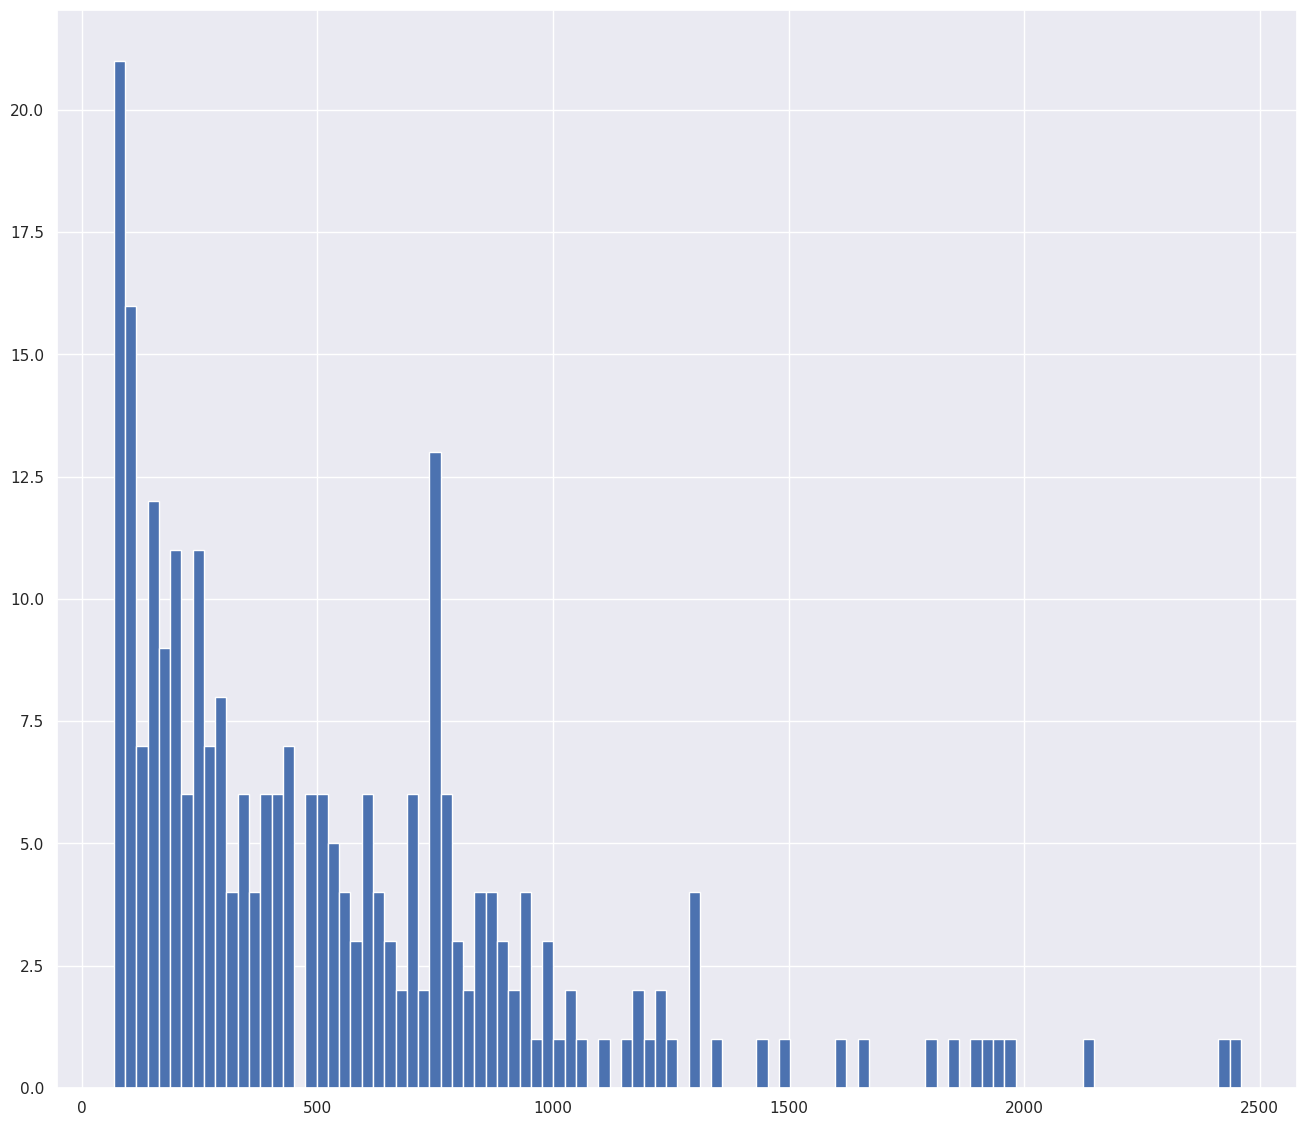

In [26]:
df["Salary"].hist(bins=100)
plt.show(block=True)

# 12. Examining the Logarithm of the Dependent Variable

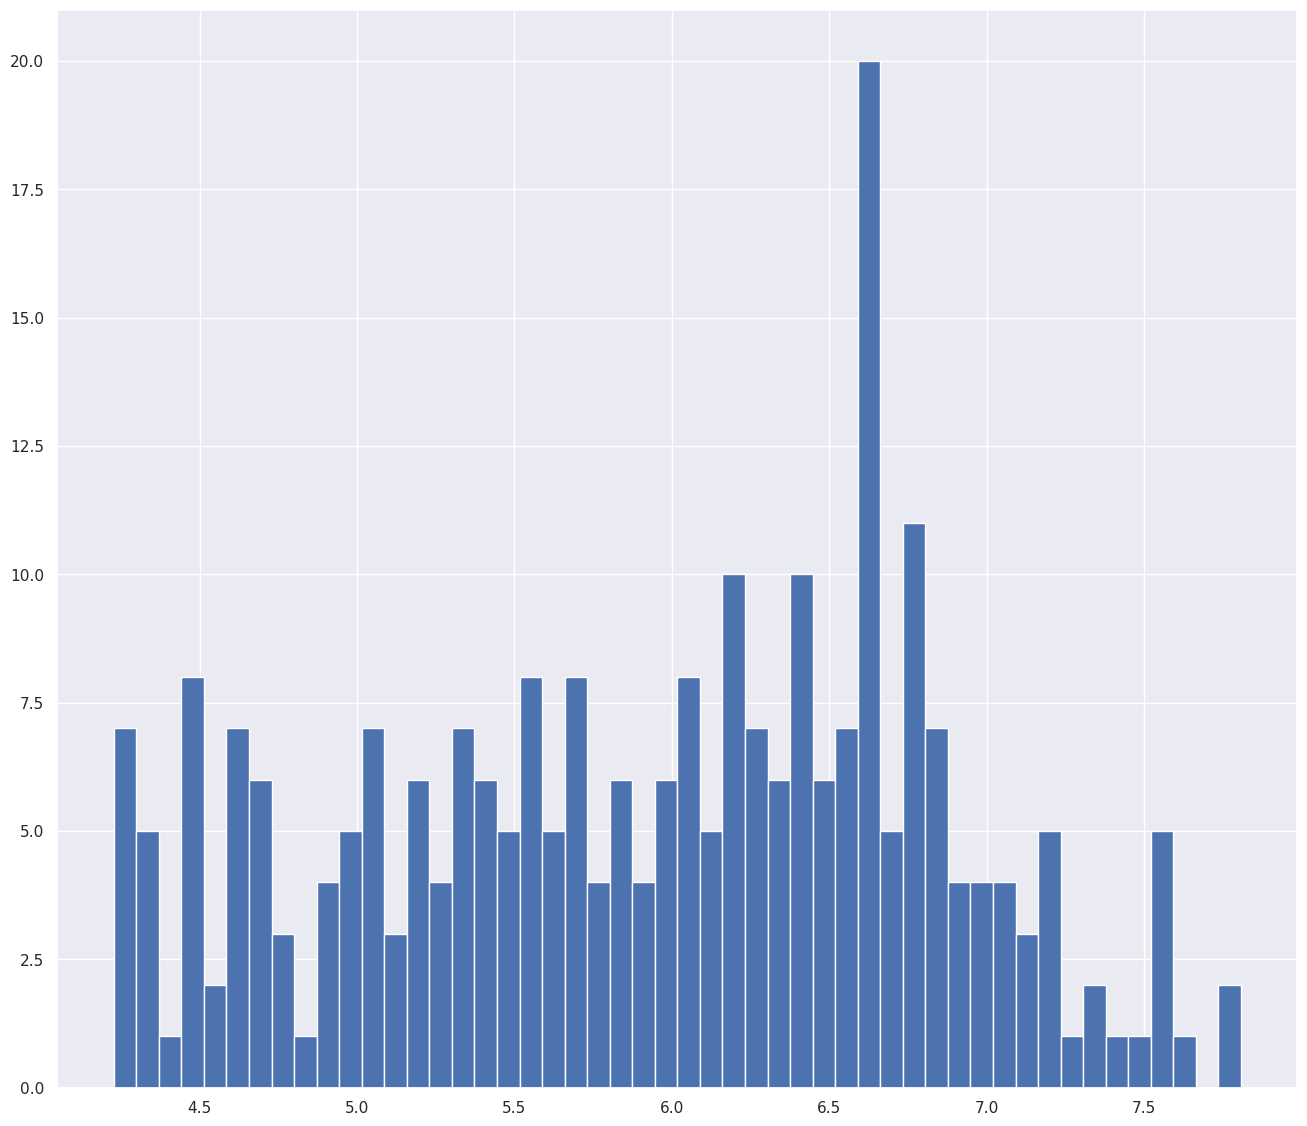

In [27]:
np.log1p(df['Salary']).hist(bins=50)
plt.show(block=True)

# 13. Outliers Analysis

In [28]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [29]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [30]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [31]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [32]:
for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [33]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


# 14. Missing Value Analysis

In [34]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [35]:
missing_values_table(df)

        n_miss  ratio
Salary      59 18.320


In [36]:
# Fill in missing variables by League and Division (A,E)(A,W)(N,E)(N,W)

df.loc[(df["Salary"].isnull()) & (df["League"] == "A") & (df["Division"] == "E"), "Salary"] = df.groupby(["League","Division"])["Salary"].mean()["A","E"]

df.loc[(df["Salary"].isnull()) & (df["League"] == "A") & (df["Division"] == "W"), "Salary"] = df.groupby(["League","Division"])["Salary"].mean()["A","W"]

df.loc[(df["Salary"].isnull()) & (df["League"] == "N") & (df["Division"] == "E"), "Salary"] = df.groupby(["League","Division"])["Salary"].mean()["N","E"]

df.loc[(df["Salary"].isnull()) & (df["League"] == "N") & (df["Division"] == "W"), "Salary"] = df.groupby(["League","Division"])["Salary"].mean()["N","W"]

In [37]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


# 15. Rare Analysis

In [38]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        print(pd.DataFrame({'COUNT': dataframe[col].value_counts(),
                            'RATIO': dataframe[col].value_counts() / len(dataframe),
                            'TARGET_MEAN': dataframe.groupby(col)[target].mean()}), end='\n\n\n')

In [39]:
rare_analyser(df, "Salary", cat_cols)

League : 2
   COUNT  RATIO  TARGET_MEAN
A    175  0.543      523.697
N    147  0.457      514.920


Division : 2
   COUNT  RATIO  TARGET_MEAN
E    157  0.488      595.486
W    165  0.512      447.569


NewLeague : 2
   COUNT  RATIO  TARGET_MEAN
A    176  0.547      519.358
N    146  0.453      520.090




In [40]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [41]:
rare_encoder(df, 0.01)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30.000,29.000,14.000,1.000,293.000,66.000,1,30.000,29.000,14.000,A,E,446.000,33.000,20,634.982,A
1,315,81,7,24.000,38.000,39.000,14.000,3449.000,835.000,69,321.000,414.000,375.000,N,W,632.000,43.000,10,475.000,N
2,479,130,18,66.000,72.000,76.000,3.000,1624.000,457.000,63,224.000,266.000,263.000,A,W,648.625,82.000,14,480.000,A
3,496,141,20,65.000,78.000,37.000,11.000,5628.000,1575.000,204,828.000,838.000,354.000,N,E,200.000,11.000,3,500.000,N
4,321,87,10,39.000,42.000,30.000,2.000,396.000,101.000,12,48.000,46.000,33.000,N,E,648.625,40.000,4,91.500,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65.000,48.000,37.000,5.000,2703.000,806.000,32,379.000,311.000,138.000,N,E,325.000,9.000,3,700.000,N
318,492,136,5,76.000,50.000,94.000,12.000,5511.000,1511.000,39,897.000,451.000,747.250,A,E,313.000,381.000,20,875.000,A
319,475,126,3,61.000,43.000,52.000,6.000,1700.000,433.000,7,217.000,93.000,146.000,A,W,37.000,113.000,7,385.000,A
320,573,144,9,85.000,60.000,78.000,8.000,3198.000,857.000,97,470.000,420.000,332.000,A,E,648.625,131.000,12,960.000,A


# 16. Feature Extraction

In [42]:
new_num_cols=[col for col in num_cols if col!="Salary"]

In [43]:
new_num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [44]:
df[new_num_cols]=df[new_num_cols]+0.0000000001

In [45]:
# "New Hit Ratio and Total Hits": Ratio of a player's seasonal hits to career hits plus the seasonal hits.
df['NEW_Hits'] = df['Hits'] / df['CHits'] + df['Hits']

# "New RBI Ratio": Ratio of a player's seasonal RBI to career RBI.
df['NEW_RBI'] = df['RBI'] / df['CRBI']

# "New Walks Ratio": Ratio of a player's seasonal walks to career walks.
df['NEW_Walks'] = df['Walks'] / df['CWalks']

# "Total PutOuts": A player's total putouts over the course of his career.
df['NEW_PutOuts'] = df['PutOuts'] * df['Years']

# "Hits Success Rate": A player's success rate in hits.
df["Hits_Success"] = (df["Hits"] / df["AtBat"]) * 100

# "Total Career RBI and AtBat": The product of a player's career RBI and career AtBat.
df["NEW_CRBI*CATBAT"] = df['CRBI'] * df['CAtBat']

# "Average Yearly Career Hits": A player's average career hits per year.
df["NEW_Chits"] = df["CHits"] / df["Years"]

# "Total Career HmRun": A player's total home runs over the course of his career.
df["NEW_CHmRun"] = df["CHmRun"] * df["Years"]

# "Average Yearly Career Runs": A player's average career runs per year.
df["NEW_CRuns"] = df["CRuns"] / df["Years"]

# "Total Career Hits": A player's total hits over the course of his career.
df["NEW_Chits"] = df["CHits"] * df["Years"]

# "RBI and Walks Product": The product of a player's RBI and Walks.
df["NEW_RW"] = df["RBI"] * df["Walks"]

# "RBI to Walks Ratio": The ratio of a player's RBI to Walks.
df["NEW_RBWALK"] = df["RBI"] / df["Walks"]

# "Career Hits to AtBat Ratio": The ratio of a player's career hits to career AtBats.
df["NEW_CH_CB"] = df["CHits"] / df["CAtBat"]

# "Career HmRun to AtBat Ratio": The ratio of a player's career home runs to career AtBats.
df["NEW_CHm_CAT"] = df["CHmRun"] / df["CAtBat"]

# "AtBat Difference": The difference between a player's yearly average career AtBats and seasonal AtBats.
df['NEW_Diff_Atbat'] = df['AtBat'] - (df['CAtBat'] / df['Years'])

# "Hits Difference": The difference between a player's yearly average career hits and seasonal hits.
df['NEW_Diff_Hits'] = df['Hits'] - (df['CHits'] / df['Years'])

# "HmRun Difference": The difference between a player's yearly average career home runs and seasonal home runs.
df['NEW_Diff_HmRun'] = df['HmRun'] - (df['CHmRun'] / df['Years'])

# "Runs Difference": The difference between a player's yearly average career runs and seasonal runs.
df['NEW_Diff_Runs'] = df['Runs'] - (df['CRuns'] / df['Years'])

# "RBI Difference": The difference between a player's yearly average career RBI and seasonal RBI.
df['NEW_Diff_RBI'] = df['RBI'] - (df['CRBI'] / df['Years'])

# "Walks Difference": The difference between a player's yearly average career walks and seasonal walks.
df['NEW_Diff_Walks'] = df['Walks'] - (df['CWalks'] / df['Years'])

In [46]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20.000,634.982,A,67.000,1.000,1.000,446.000,22.526,8497.000,66.000,1.000,30.000,406.000,2.071,0.225,0.003,0.000,0.000,0.000,0.000,0.000,0.000
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10.000,475.000,N,81.097,0.092,0.104,8848.000,25.714,1427886.000,11690.000,966.000,22.929,1482.000,0.974,0.242,0.020,68.643,21.357,2.071,1.071,8.429,12.214
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,648.625,82.000,14.000,480.000,A,130.284,0.271,0.289,1945.875,27.140,431984.000,1371.000,189.000,74.667,5472.000,0.947,0.281,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,N,E,200.000,11.000,3.000,500.000,N,141.090,0.093,0.105,2200.000,28.427,4716264.000,17325.000,2244.000,75.273,2886.000,2.108,0.280,0.036,-15.636,-2.182,1.455,-10.273,1.818,4.818
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,N,E,648.625,40.000,4.000,91.500,N,87.861,0.913,0.909,1297.250,27.103,18216.000,202.000,24.000,24.000,1260.000,1.400,0.255,0.030,123.000,36.500,4.000,15.000,19.000,13.500


# 17. Encoding

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AtBat            322 non-null    float64
 1   Hits             322 non-null    float64
 2   HmRun            322 non-null    float64
 3   Runs             322 non-null    float64
 4   RBI              322 non-null    float64
 5   Walks            322 non-null    float64
 6   Years            322 non-null    float64
 7   CAtBat           322 non-null    float64
 8   CHits            322 non-null    float64
 9   CHmRun           322 non-null    float64
 10  CRuns            322 non-null    float64
 11  CRBI             322 non-null    float64
 12  CWalks           322 non-null    float64
 13  League           322 non-null    object 
 14  Division         322 non-null    object 
 15  PutOuts          322 non-null    float64
 16  Assists          322 non-null    float64
 17  Errors          

In [48]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 322
Variables: 39
cat_cols: 3
num_cols: 36
cat_but_car: 0
num_but_cat: 0


In [49]:
cat_cols

['League', 'Division', 'NewLeague']

In [50]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary',
 'NEW_Hits',
 'NEW_RBI',
 'NEW_Walks',
 'NEW_PutOuts',
 'Hits_Success',
 'NEW_CRBI*CATBAT',
 'NEW_Chits',
 'NEW_CHmRun',
 'NEW_CRuns',
 'NEW_RW',
 'NEW_RBWALK',
 'NEW_CH_CB',
 'NEW_CHm_CAT',
 'NEW_Diff_Atbat',
 'NEW_Diff_Hits',
 'NEW_Diff_HmRun',
 'NEW_Diff_Runs',
 'NEW_Diff_RBI',
 'NEW_Diff_Walks']

In [51]:
cat_but_car

[]

In [52]:
num_but_cat

[]

In [53]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [54]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [55]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,446.000,33.000,20.000,634.982,67.000,1.000,1.000,446.000,22.526,8497.000,66.000,1.000,30.000,406.000,2.071,0.225,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10.000,475.000,81.097,0.092,0.104,8848.000,25.714,1427886.000,11690.000,966.000,22.929,1482.000,0.974,0.242,0.020,68.643,21.357,2.071,1.071,8.429,12.214,1,1,1
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,648.625,82.000,14.000,480.000,130.284,0.271,0.289,1945.875,27.140,431984.000,1371.000,189.000,74.667,5472.000,0.947,0.281,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667,0,1,0
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,200.000,11.000,3.000,500.000,141.090,0.093,0.105,2200.000,28.427,4716264.000,17325.000,2244.000,75.273,2886.000,2.108,0.280,0.036,-15.636,-2.182,1.455,-10.273,1.818,4.818,1,0,1
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,648.625,40.000,4.000,91.500,87.861,0.913,0.909,1297.250,27.103,18216.000,202.000,24.000,24.000,1260.000,1.400,0.255,0.030,123.000,36.500,4.000,15.000,19.000,13.500,1,0,1


# 18. Standardization Process

In [56]:
num_cols = [col for col in num_cols if col not in ["Salary"]]

In [57]:
scaler = RobustScaler()

In [58]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [59]:
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
0,-0.337,-0.411,-0.583,-0.465,-0.408,-0.677,-0.714,-0.526,-0.520,-0.480,-0.509,-0.567,-0.575,1.085,-0.041,1.750,634.982,-0.401,2.249,2.434,-0.381,-0.896,-0.272,-0.283,-0.296,-0.401,-0.464,0.922,-1.239,-0.862,-0.410,-0.341,-0.350,-0.309,-0.404,-0.435,0,0,0
1,-0.251,-0.205,-0.083,-0.619,-0.163,0.129,1.143,0.489,0.385,0.414,0.174,0.573,0.752,1.947,0.022,0.500,475.000,-0.208,-0.331,-0.354,4.342,-0.052,0.625,0.790,1.020,-0.619,-0.034,-0.331,-0.679,-0.070,0.109,0.195,0.035,-0.262,0.013,0.283,1,1,1
2,0.388,0.466,0.833,0.465,0.762,1.323,-0.429,-0.098,-0.060,0.336,-0.054,0.135,0.340,2.024,0.267,1.000,480.000,0.465,0.177,0.222,0.462,0.325,-0.004,-0.162,-0.040,0.974,1.562,-0.362,0.629,0.828,-0.882,-0.902,-0.907,-0.691,-1.229,-1.121,0,1,0
3,0.454,0.616,1.000,0.439,0.925,0.065,0.714,1.191,1.255,2.191,1.364,1.830,0.675,-0.056,-0.179,-0.375,500.000,0.612,-0.327,-0.352,0.605,0.665,2.701,1.310,2.762,0.993,0.528,0.964,0.577,0.706,-0.528,-0.396,-0.079,-0.762,-0.314,-0.152,1,0,1
4,-0.228,-0.123,0.167,-0.232,-0.054,-0.161,-0.571,-0.493,-0.479,-0.336,-0.467,-0.517,-0.506,2.024,0.003,-0.250,91.500,-0.115,2.002,2.151,0.097,0.315,-0.265,-0.270,-0.264,-0.586,-0.122,0.155,-0.248,0.422,0.521,0.576,0.393,0.353,0.537,0.359,1,0,1
5,0.835,1.000,-0.333,0.671,0.190,0.000,0.714,0.798,0.735,-0.243,0.596,0.342,0.086,0.324,2.296,2.125,750.000,0.996,-0.161,-0.116,1.112,0.672,0.658,0.862,-0.012,0.078,0.088,0.220,-0.182,-0.819,1.052,1.317,0.073,0.946,0.609,0.586,0,1,0
6,-0.758,-0.808,-0.583,-0.645,-0.980,-0.452,-0.571,-0.552,-0.548,-0.480,-0.509,-0.627,-0.539,-0.630,0.550,0.125,70.000,-0.799,1.933,2.045,-0.546,-1.564,-0.276,-0.281,-0.294,-0.863,-0.559,-1.009,-2.204,-0.802,0.180,0.061,-0.257,0.044,-0.231,0.094,1,0,0
7,-0.317,-0.315,-0.667,-0.619,-0.544,-0.903,-0.429,-0.457,-0.470,-0.493,-0.484,-0.544,-0.583,-0.422,1.531,0.375,100.000,-0.309,1.251,1.138,-0.428,-0.374,-0.265,-0.259,-0.297,-0.904,-0.559,2.472,-1.674,-1.025,0.561,0.588,-0.350,0.147,0.174,-0.259,0,1,0
8,-0.220,-0.205,-0.167,-0.568,-0.327,-0.871,-0.571,-0.511,-0.496,-0.414,-0.505,-0.553,-0.597,-0.320,1.575,1.625,75.000,-0.196,2.082,2.434,-0.471,-0.221,-0.270,-0.273,-0.281,-0.832,-0.524,3.125,-0.343,-0.185,0.744,0.613,0.208,0.132,0.339,-0.200,1,1,1
9,0.084,-0.055,0.750,0.026,0.599,0.968,1.000,1.055,0.969,2.191,1.261,1.984,2.120,-0.983,-0.248,-0.750,1100.000,-0.058,-0.381,-0.407,-0.632,-0.785,2.649,1.310,3.318,0.532,1.089,-0.284,-0.221,0.847,-0.406,-0.604,-0.107,-0.808,-0.526,0.007,0,0,0


In [60]:
# Editing of variable names.

df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '')
df.columns = df.columns.str.lower()

In [61]:
df.head()

,atbat,hits,hmrun,runs,rbi,walks,years,catbat,chits,chmrun,cruns,crbi,cwalks,putouts,assists,errors,salary,new_hits,new_rbi,new_walks,new_putouts,hits_success,new_crbicatbat,new_chits,new_chmrun,new_cruns,new_rw,new_rbwalk,new_ch_cb,new_chm_cat,new_diff_atbat,new_diff_hits,new_diff_hmrun,new_diff_runs,new_diff_rbi,new_diff_walks,league_n,division_w,newleague_n
0,-0.337,-0.411,-0.583,-0.465,-0.408,-0.677,-0.714,-0.526,-0.520,-0.480,-0.509,-0.567,-0.575,1.085,-0.041,1.750,634.982,-0.401,2.249,2.434,-0.381,-0.896,-0.272,-0.283,-0.296,-0.401,-0.464,0.922,-1.239,-0.862,-0.410,-0.341,-0.350,-0.309,-0.404,-0.435,0,0,0
1,-0.251,-0.205,-0.083,-0.619,-0.163,0.129,1.143,0.489,0.385,0.414,0.174,0.573,0.752,1.947,0.022,0.500,475.000,-0.208,-0.331,-0.354,4.342,-0.052,0.625,0.790,1.020,-0.619,-0.034,-0.331,-0.679,-0.070,0.109,0.195,0.035,-0.262,0.013,0.283,1,1,1
2,0.388,0.466,0.833,0.465,0.762,1.323,-0.429,-0.098,-0.060,0.336,-0.054,0.135,0.340,2.024,0.267,1.000,480.000,0.465,0.177,0.222,0.462,0.325,-0.004,-0.162,-0.040,0.974,1.562,-0.362,0.629,0.828,-0.882,-0.902,-0.907,-0.691,-1.229,-1.121,0,1,0
3,0.454,0.616,1.000,0.439,0.925,0.065,0.714,1.191,1.255,2.191,1.364,1.830,0.675,-0.056,-0.179,-0.375,500.000,0.612,-0.327,-0.352,0.605,0.665,2.701,1.310,2.762,0.993,0.528,0.964,0.577,0.706,-0.528,-0.396,-0.079,-0.762,-0.314,-0.152,1,0,1
4,-0.228,-0.123,0.167,-0.232,-0.054,-0.161,-0.571,-0.493,-0.479,-0.336,-0.467,-0.517,-0.506,2.024,0.003,-0.250,91.500,-0.115,2.002,2.151,0.097,0.315,-0.265,-0.270,-0.264,-0.586,-0.122,0.155,-0.248,0.422,0.521,0.576,0.393,0.353,0.537,0.359,1,0,1


# 19. Creating Model

In [62]:
y = df["salary"]

In [63]:
X = df.drop(["salary"], axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [65]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []

for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)
    
    # Calculate R^2 score
    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate MAE
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"R^2 Score: {round(r2, 4)} ({name})")
    print(f"MAE: {round(mae, 4)} ({name})")
    print(f"MSE: {round(mse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

RMSE: 251.6696 (LR)
R^2 Score: 0.7066 (LR)
MAE: 194.92 (LR)
MSE: 59667.7042 (LR)
Execution Time: 0.12 seconds

RMSE: 242.6049 (Ridge)
R^2 Score: 0.7025 (Ridge)
MAE: 194.8836 (Ridge)
MSE: 60513.74 (Ridge)
Execution Time: 0.11 seconds

RMSE: 242.7515 (Lasso)
R^2 Score: 0.7039 (Lasso)
MAE: 193.4879 (Lasso)
MSE: 60221.2505 (Lasso)
Execution Time: 0.22 seconds

RMSE: 272.3487 (ElasticNet)
R^2 Score: 0.4977 (ElasticNet)
MAE: 243.9955 (ElasticNet)
MSE: 102169.772 (ElasticNet)
Execution Time: 0.1 seconds

RMSE: 275.9376 (KNN)
R^2 Score: 0.4502 (KNN)
MAE: 248.6047 (KNN)
MSE: 111829.2658 (KNN)
Execution Time: 0.27 seconds

RMSE: 314.8774 (CART)
R^2 Score: 0.588 (CART)
MAE: 194.7548 (CART)
MSE: 83802.3627 (CART)
Execution Time: 0.08 seconds

RMSE: 228.2138 (RF)
R^2 Score: 0.6785 (RF)
MAE: 202.7529 (RF)
MSE: 65387.2823 (RF)
Execution Time: 3.83 seconds

RMSE: 236.5583 (GBM)
R^2 Score: 0.704 (GBM)
MAE: 190.7246 (GBM)
MSE: 60200.0833 (GBM)
Execution Time: 1.94 seconds

RMSE: 252.929 (XGBoost)
R^2 Sc

# 20. Hyperparameter optimization

In [66]:
# Initialize the models
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

# Initialize lists to store metrics
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []

# Define the hyperparameters for each model

param_grids = {
    'LR': {},
    'Ridge': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
    'KNN': {'n_neighbors': [1, 3, 5, 7, 9]},
    'CART': {'max_depth': [None, 5, 10, 20, 30], 'min_samples_leaf': [1, 2, 3]},
    'RF': {'n_estimators': [10, 30, 50, 70, 100], 'max_depth': [None, 5, 10, 20]},
    'GBM': {'n_estimators': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1]},
    'XGBoost': {'n_estimators': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1]},
    'LightGBM': {'n_estimators': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1]},
    'CatBoost': {'iterations': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1], 'depth': [3, 4, 5, 6, 7]}
}

# Variables to store best model and score globally
best_global_score = np.inf
best_global_model = None

# Train and evaluate the models with hyperparameter tuning
for name, regressor in models:
    print(f"Hyperparameter Tuning for {name}:")
    start_time = time.time()

    if param_grids[name]:
        grid_search = GridSearchCV(regressor, param_grid=param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        print(f"Best parameters: {grid_search.best_params_}")
    else:
        best_model = regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    # If current model's score is better, update best global model and score
    if rmse < best_global_score:
        best_global_score = rmse
        best_global_model = best_model

    # Calculate R^2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"R^2 Score: {round(r2, 4)} ({name})")
    print(f"MAE: {round(mae, 4)} ({name})")
    print(f"MSE: {round(mse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

Hyperparameter Tuning for LR:
RMSE: 244.2697 (LR)
R^2 Score: 0.7066 (LR)
MAE: 194.92 (LR)
MSE: 59667.7042 (LR)
Execution Time: 0.02 seconds

Hyperparameter Tuning for Ridge:
Best parameters: {'alpha': 1.0}
RMSE: 245.9954 (Ridge)
R^2 Score: 0.7025 (Ridge)
MAE: 194.8836 (Ridge)
MSE: 60513.74 (Ridge)
Execution Time: 0.26 seconds

Hyperparameter Tuning for Lasso:
Best parameters: {'alpha': 1.0}
RMSE: 245.4002 (Lasso)
R^2 Score: 0.7039 (Lasso)
MAE: 193.4879 (Lasso)
MSE: 60221.2505 (Lasso)
Execution Time: 0.39 seconds

Hyperparameter Tuning for ElasticNet:
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.3}
RMSE: 250.1351 (ElasticNet)
R^2 Score: 0.6924 (ElasticNet)
MAE: 196.2525 (ElasticNet)
MSE: 62567.5841 (ElasticNet)
Execution Time: 1.41 seconds

Hyperparameter Tuning for KNN:
Best parameters: {'n_neighbors': 9}
RMSE: 322.0234 (KNN)
R^2 Score: 0.4902 (KNN)
MAE: 242.6699 (KNN)
MSE: 103699.0646 (KNN)
Execution Time: 0.27 seconds

Hyperparameter Tuning for CART:
Best parameters: {'max_depth': 

# 21. Final Model Predictions and Comparison with True Prices

In [67]:
best_global_model

LinearRegression()

In [68]:
# Final Prediction Model
final_model = best_global_model

# Make predictions on the test set using the final model
y_final_pred = final_model.predict(X_test)
final_y_pred = (y_final_pred)
final_y_test =(y_test)

In [69]:
# Create a DataFrame with the predicted prices and true prices
results = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})

# Calculate the difference between the true prices and predicted prices and add a new column
results['Difference'] = results['True Price'] - results['Predicted Price']

# Display the results
print(results)

     Predicted Price  True Price  Difference
311          550.038     525.000     -25.038
233           12.702     172.000     159.298
205          296.983      90.000    -206.983
251          423.442     425.000       1.558
16          1039.566     775.000    -264.566
..               ...         ...         ...
58           505.456     416.667     -88.789
82           972.081    1590.000     617.919
154          724.725     277.500    -447.225
62           379.226     230.000    -149.226
295          483.354     920.000     436.646

[65 rows x 3 columns]
